<a href="https://colab.research.google.com/github/helakhaddar/Graduation_project/blob/main/Data_Preparation_firstDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation : Cyberbullying dataset available on Kaggle

This file is about the first step of the data preparation where:
  

1.   load three datasets from the cyberbullying dataset available in Kaggle (Twitter/Youtube/ Kaggle)
https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

2.   Data analysis of each dataset :
       
*   First, I removed some extra columns and kept only the text, the label
and add it a sentiment label column just to do some analysis  

*   Second, I saw the distribution of the label, sentiment label in each class , for each dataset
3. We only merged the datasets from twitter and kaggle comments together and saved it to a file called merged dataset and saw the distribution of the labels.

 Now, we will do the preprocessing of the merged dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
directory_path ="/content/drive/MyDrive/PFE/Data/"

### **Import the necessary librairies**

In [ ]:
## Importing the necessary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import requests
from PIL import Image
from collections import Counter
from tqdm import tqdm

import string
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud ,STOPWORDS

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

### Useful function

In [ ]:
def plot_label_distribution(df, label_column='Label'):
    """
    This function takes a DataFrame, maps the label column to 'Non-cyberbullying' and 'Bullying',
    drops the specified index column, and plots the distribution of the labels.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    label_column (str): The name of the label column to map and plot.
    """
    # Map the label column
    df['label'] = df[label_column].map({0: 'Non-cyberbullying', 1: 'Bullying'})

    # Plotting the distribution
    plt.figure(figsize=(6, 4))
    df['label'].value_counts().plot(kind='bar', color=['blue', 'red'])
    plt.title('Distribution of Cyberbullying Labels')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [ ]:
## Using the nltk library to analyze sentiment of each text so that we can correlate it with bullying
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment of a text
def get_sentiment(df):
    df['Sentiment_Label'] = df['Text'].apply(lambda x: 'positive' if sia.polarity_scores(x)['compound'] >= 0 else 'negative')
    df = df.drop(['label'], axis=1)
    return df


In [ ]:
def plot_distribution_sentimentlabel(df):

  plt.figure(figsize=(3, 3))
  df['Sentiment_Label'].value_counts().plot(kind='bar', color=['blue', 'red'])
  plt.title('Distribution of sentiment Labels ')
  plt.xlabel('sentiment')
  plt.ylabel('Count')
  plt.xticks(rotation=0)
  plt.show()

def plot_relation_sent_label(df):
  sent_label_cross = pd.crosstab(df['Sentiment_Label'], df['Label'])
  sent_label_cross['sum'] = sent_label_cross[0.0] + sent_label_cross[1.0]
  sent_label_cross['non bullying tweet %'] = sent_label_cross[0.0]/sent_label_cross['sum']*100
  sent_label_cross['bullying tweet %'] = sent_label_cross[1.0]/sent_label_cross['sum']*100
  sent_label_cross = sent_label_cross.drop([0.0, 1.0, 'sum'], axis=1)

  ax = sent_label_cross.plot(kind='bar', stacked=True, figsize=(6, 4), color=['#6dd2ac', '#3487a5'], width=0.8)
  plt.xlabel('Sentiment')
  plt.ylabel('percentage %')
  plt.title('Relation between sentiment and bullying')
  ax.legend(loc='lower right')
  plt.show()

## **Loading the datasets (Twitter/Kaggle/Youtube)**

### Twitter Dataset

In [ ]:
Twitter_df = pd.read_csv(directory_path + "/Cyberbullying dataset/twitter_parsed_dataset.csv")
Twitter_df = Twitter_df.drop(['id', 'index', 'Annotation'], axis=1)
Twitter_df.rename(columns={'oh_label': 'Label'}, inplace=True)
Twitter_df = Twitter_df.dropna(subset=['Label'])

In [ ]:
print('\nTwitter Dataset shape: ', Twitter_df.shape)
Twitter_df.head()


Twitter Dataset shape:  (16848, 2)


,Text,Label
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0
1,@ShreyaBafna3 Now you idiots claim that people...,0.0
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0
4,#mkr No No No No No No,0.0


In [ ]:
Twitter_df.Label.value_counts()

,count
Label,
0.0,11501
1.0,5347


In [ ]:
Twitter_df.to_csv(os.path.join(directory_path, 'cleaned_twitter.csv'), index=False)

### Youtube Dataset

In [ ]:
Yout_df = pd.read_csv(directory_path + " /youtube_parsed_dataset.csv")
Yout_df = Yout_df.drop(['index', 'UserIndex', 'Number of Comments', 'Number of Subscribers', 'Membership Duration', 'Number of Uploads', 'Age', 'Profanity in UserID'], axis=1)
Yout_df.rename(columns={'oh_label': 'Label'}, inplace=True)
Yout_df = Yout_df.dropna(subset=['Label'])

In [ ]:
Yout_df.head()

,Text,Label
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0
1,There are so many things that are incorrect wi...,0
2,3:26 hahah my boyfriend showed this song to me...,1
3,dick beyonce fuck y a ass hole you are truely ...,1
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0


### Kaggle dataset

In [ ]:
Kaggle_df = pd.read_csv(directory_path + " kaggle_parsed_dataset.csv")
Kaggle_df = Kaggle_df.drop(['index', 'Date'], axis=1)
Kaggle_df.rename(columns={'oh_label': 'Label'}, inplace=True)
Kaggle_df = Kaggle_df.dropna(subset=['Label'])

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PFE/Data/ kaggle_parsed_dataset.csv'

In [ ]:
Kaggle_df = Kaggle_df[['Text', 'Label']]

Kaggle_df.head()

,Text,Label
0,"""You fuck your dad.""",1
1,"""i really don't understand your point.\xa0 It ...",0
2,"""A\\xc2\\xa0majority of Canadians can and has ...",0
3,"""listen if you dont wanna get married to a man...",0
4,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...",0


## **Data analysis of the three dataset**


### 1.   Twitter Dataset



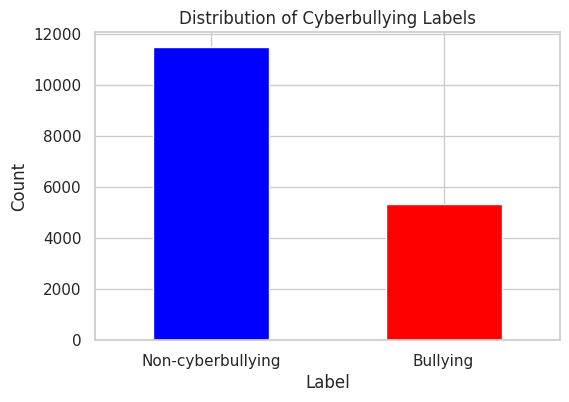

In [ ]:
plot_label_distribution(Twitter_df)

=< There is some imbalance in the dataset where the bullying label is very few compared to the non-cyberbullying

In [ ]:
get_sentiment(Twitter_df)

,Text,Label,Sentiment_Label
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,negative
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,negative
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,positive
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,negative
4,#mkr No No No No No No,0.0,negative
...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",0.0,positive
16847,#MKR 'pretty good dishes we're happy with' - O...,0.0,positive
16848,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,positive
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,negative


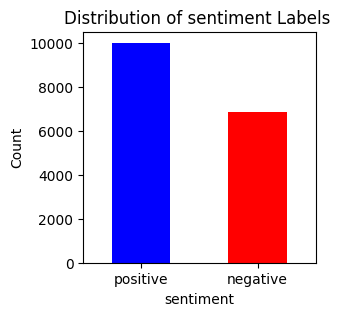

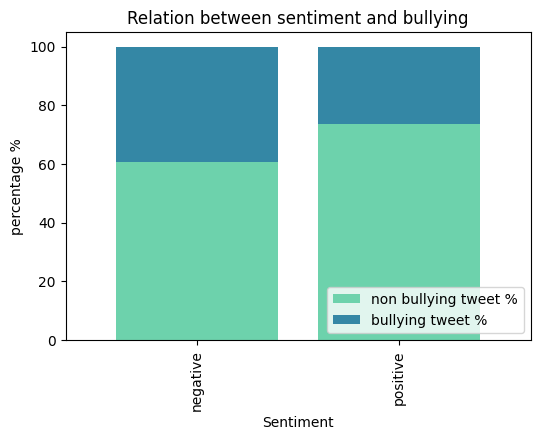

In [ ]:
plot_distribution_sentimentlabel(Twitter_df)
plot_relation_sent_label(Twitter_df)

The dataset contains a lot of negative tweets... which is a good thing since our models should be able to understand the difference between a negative tweet and a bullying tweet. It shouldn't flag every other negative tweet as bullying.

### 2.   Youtube dataset



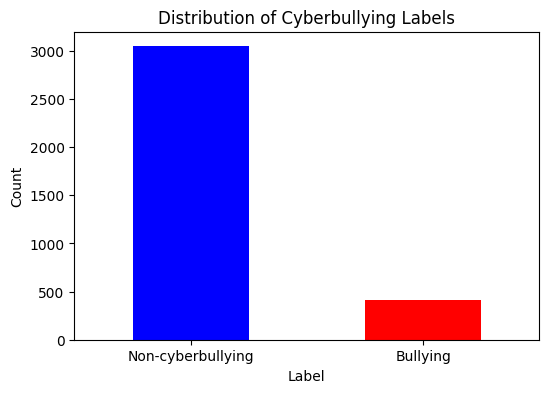

In [ ]:
plot_label_distribution(Yout_df)

In [ ]:
get_sentiment(Yout_df)

,Text,Label,Sentiment_Label
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0,negative
1,There are so many things that are incorrect wi...,0,negative
2,3:26 hahah my boyfriend showed this song to me...,1,positive
3,dick beyonce fuck y a ass hole you are truely ...,1,negative
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0,positive
...,...,...,...
3459,She pretty I love this song I miss the old kel...,1,positive
3460,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,0,negative
3461,JR so cute EXO M Better I agree like yeah yeah...,0,positive
3462,! !,0,positive


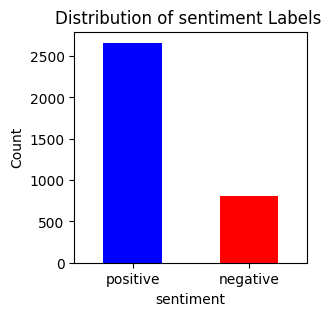

In [ ]:
plot_distribution_sentimentlabel(Yout_df)

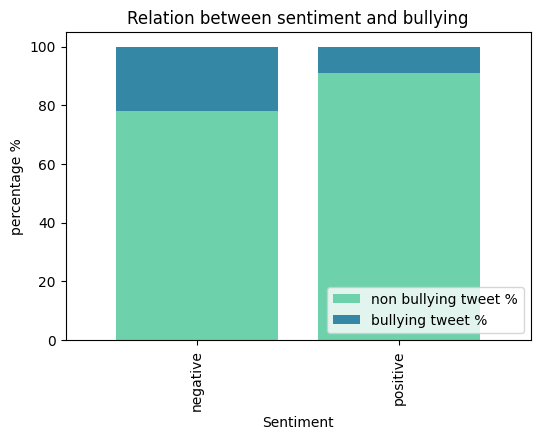

In [ ]:
plot_relation_sent_label(Yout_df)

### 3.   Kaggle Dataset



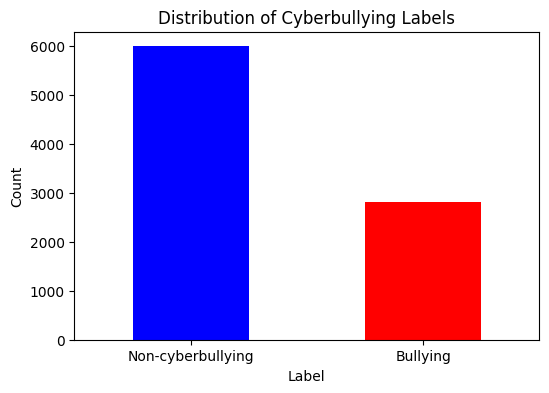

In [ ]:
plot_label_distribution(Kaggle_df)

In [ ]:
get_sentiment(Kaggle_df)

,Text,Label,Sentiment_Label
0,"""You fuck your dad.""",1,negative
1,"""i really don't understand your point.\xa0 It ...",0,positive
2,"""A\\xc2\\xa0majority of Canadians can and has ...",0,negative
3,"""listen if you dont wanna get married to a man...",0,negative
4,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...",0,positive
...,...,...,...
8794,"""Never really gave it much thought. I just fig...",0,positive
8795,"""Nadie se salva de la regla 34 xd""",0,positive
8796,"""Question: Are you a boy or a girl?""",0,positive
8797,"""Leave your email or phone number and maybe yo...",1,negative


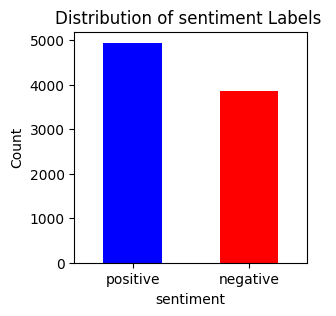

In [ ]:
plot_distribution_sentimentlabel(Kaggle_df)

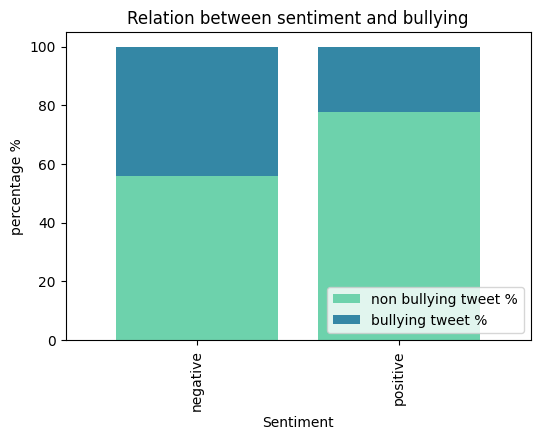

In [ ]:
plot_relation_sent_label(Kaggle_df)

## **Merging the datasets**

In [ ]:
merged_df = pd.concat([Yout_df[['Text', 'Label', 'Sentiment_Label']], Twitter_df[['Text', 'Label','Sentiment_Label']], Kaggle_df[['Text', 'Label', 'Sentiment_Label']]], axis=0, ignore_index=True)

In [ ]:
merged_df

,Text,Label,Sentiment_Label
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0.0,negative
1,There are so many things that are incorrect wi...,0.0,negative
2,3:26 hahah my boyfriend showed this song to me...,1.0,positive
3,dick beyonce fuck y a ass hole you are truely ...,1.0,negative
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0.0,positive
...,...,...,...
29106,"""Never really gave it much thought. I just fig...",0.0,positive
29107,"""Nadie se salva de la regla 34 xd""",0.0,positive
29108,"""Question: Are you a boy or a girl?""",0.0,positive
29109,"""Leave your email or phone number and maybe yo...",1.0,negative


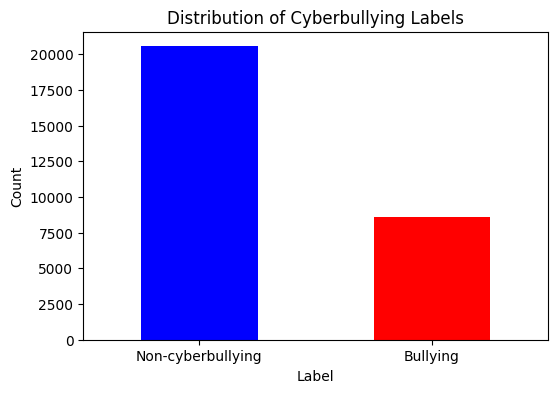

In [ ]:
plot_label_distribution(merged_df)

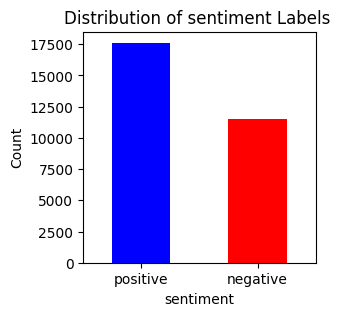

In [ ]:
plot_distribution_sentimentlabel(merged_df)

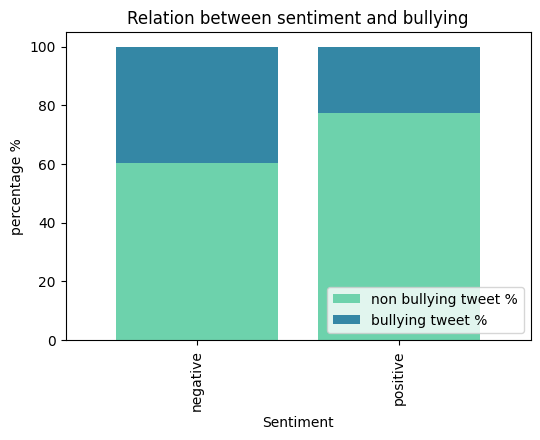

In [ ]:
plot_relation_sent_label(merged_df)

This distribution indicates that while both positive and negative tweets are more likely to be non-bullying, negative tweets have a slightly higher tendency to be associated with bullying compared to positive tweets. The overall proportion of non-bullying tweets is higher in both sentiment categories.











In [ ]:
merged_df.to_csv(os.path.join(directory_path, 'merged_dataset.csv'), index=False)

## **Merging twitter and kaggle**

In [ ]:
merged_dftk = pd.read_csv(directory_path + "merged_dataset2.csv")

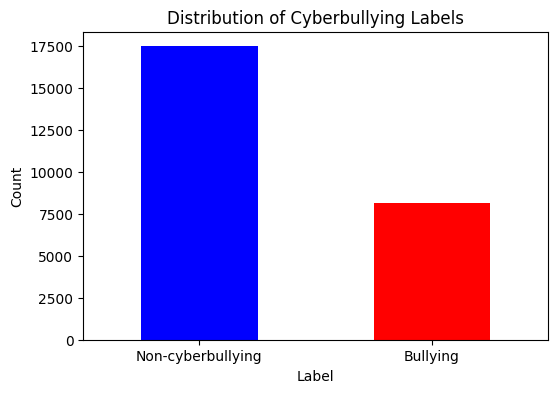

In [ ]:
plot_label_distribution(merged_dftk)

## **We chose to merge the kaggle and twitter dataset because the youtube dataset has noises and don't have any added value**